### import

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

### Generate Data


In [172]:
np.random.seed(15)
X = np.random.rand(1000, 1) # 100 random numbers between 0 and 1
y = 4 * X - 2 + np.random.randn(1000, 1)  # y = 4X - 2 + noise

print(X.shape, y.shape)
# print (X[:10])
# print (y[:10])
# print (X, y)    
# print the features and the target values as table
data = np.hstack((X, y))
print(pd.DataFrame(data, columns=["Feature", "Target"]))

    



(1000, 1) (1000, 1)
      Feature    Target
0    0.848818  0.794028
1    0.178896 -1.161753
2    0.054363 -1.127471
3    0.361538 -1.011517
4    0.275401 -0.076632
..        ...       ...
995  0.655027 -0.175047
996  0.609045 -0.476685
997  0.582182  0.433719
998  0.952590  2.688411
999  0.942166  2.257932

[1000 rows x 2 columns]


### Split the dataset

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(800, 1) (800, 1)
(200, 1) (200, 1)


##  LinearRegression With Three way of Gradient descent

In [174]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=32, method="BGD"):
        """
        Parameters:
        - learning_rate: The step size for gradient descent updates.
        - epochs: Number of iterations for training.
        - batch_size: Size of mini-batches (only used for MBGD).
        - method: Type of gradient descent ('BGD', 'SGD', or 'MBGD').
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.method = method
        self.cur_weights = None  # parameters
        self.history = []  #  MSE for each Iteration (epochs)

    def fit(self, X, y):
        np.random.seed(15) 
        n_examples, n_features = X.shape
        X_with_bias = np.hstack((np.ones((n_examples, 1)), X))  #bias  
        self.cur_weights = np.random.randn(n_features + 1, 1)  # Initialize weights randomly 
        
        # print(self.cur_weights)

        if self.method == "BGD":
            self.batch_gradient_descent(X_with_bias, y)
        elif self.method == "SGD":
            self.stochastic_gradient_descent(X_with_bias, y)
        elif self.method == "MBGD":
            self.mini_batch_gradient_descent(X_with_bias, y)
        else:
            raise ValueError("Invalid method. Choose 'BGD', 'SGD', or 'MBGD'.")

    def predict(self, X_test):
        X_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  #  bias 
        y_pred = X_with_bias.dot(self.cur_weights)
        return y_pred
    
    

    def batch_gradient_descent(self, X, y):
        n_examples = len(y)
        for epoch in range(self.epochs):
            pred = np.dot(X, self.cur_weights)
            error = pred - y
            gradients = X.T @ error / n_examples  # same as X.T.dot(error) / num_examples
            self.cur_weights -= self.learning_rate * gradients
            mse = mean_squared_error(y,pred)
            self.history.append(mse)

    def stochastic_gradient_descent(self, X, y):
        num_examples = len(y)
        for epoch in range(self.epochs):
            for i in range(num_examples):
                random_index = np.random.randint(num_examples)
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                pred = np.dot(xi, self.cur_weights)
                error = pred - yi
                gradients = xi.T.dot(error)
                self.cur_weights -= self.learning_rate * gradients
            mse = mean_squared_error(y, X.dot(self.cur_weights))
            self.history.append(mse)

    def mini_batch_gradient_descent(self, X, y):
        num_examples = len(y)
        for epoch in range(self.epochs):
            shuffled_indices = np.random.permutation(num_examples)
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, num_examples, self.batch_size):
                xi = X_shuffled[i:i+self.batch_size]
                yi = y_shuffled[i:i+self.batch_size]
                pred = np.dot(xi, self.cur_weights)
                error = pred - yi
                gradients = xi.T.dot(error) / len(xi)
                self.cur_weights -= self.learning_rate * gradients
            
            mse = mean_squared_error(y, X.dot(self.cur_weights))
            self.history.append(mse)

BGD Mean Squared Error: 1.7555135390520635
SGD Mean Squared Error: 1.0267948319360414
MBGD Mean Squared Error: 1.024306393850342
Scikit-Learn LinearRegression Mean Squared Error: 1.0257150179982437


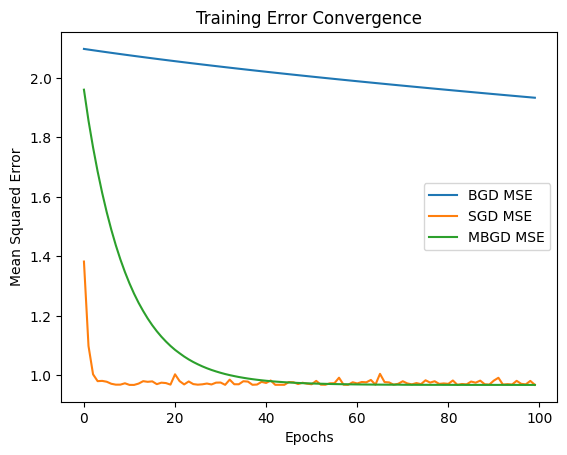

In [175]:

methods = ["BGD", "SGD", "MBGD"]
results = {}

for method in methods:
    model = LinearRegressionGD(learning_rate=0.01, epochs=100, batch_size=10, method=method)
    model.fit( X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[method] = mse
    print(f"{method} Mean Squared Error: {mse}")

    # Plot MSE history
    plt.plot(model.history, label=f"{method} MSE")

# Train and evaluate Scikit-Learn's Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_sklearn = lin_reg.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Scikit-Learn LinearRegression Mean Squared Error:", mse_sklearn)
results["Scikit-Learn"] = mse_sklearn

# Plot MSE history
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Error Convergence")
plt.legend()
plt.show()